<a href="https://colab.research.google.com/github/epochee/Drowsiness-Detection/blob/main/%EC%A1%B8%EC%9D%8C_%EC%82%AC%EC%A7%84_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

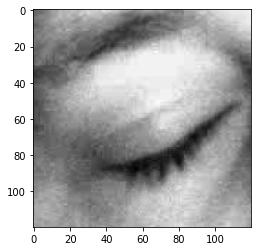

In [ ]:
image_gry = cv2.imread('/content/drive/MyDrive/sample_eyes/Closed_Eyes/s0034_00046_0_0_0_0_0_02.png',cv2.IMREAD_GRAYSCALE) 
plt.imshow(image_gry,cmap='gray')

In [ ]:
image_gry.shape

(120, 120)

In [ ]:
image_rgb = cv2.cvtColor(image_gry,cv2.COLOR_GRAY2RGB) 

In [ ]:
image_rgb.shape

(120, 120, 3)

In [ ]:
import os

base_dir = '/content/drive/MyDrive/' 

train_dir = os.path.join(base_dir, 'train')
train_cls_eye_dir = os.path.join(train_dir, 'Closed_Eyes')
train_opn_eye_dir = os.path.join(train_dir, 'Open_Eyes')

In [ ]:
print(len(os.listdir(train_cls_eye_dir)))
print(len(os.listdir(train_cls_eye_dir)))

2000
2000


In [ ]:
import tensorflow as tf 

generator = tf.keras.preprocessing.image.ImageDataGenerator(  # data augmentation
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1. / 255)
 

In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D


def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator('/content/drive/MyDrive/data/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('/content/drive/MyDrive/data/test',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

model.save('models/cnnCat3.h5', overwrite=True)

In [ ]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(224, 224), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.


In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(224, 224), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)

Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D
import sys

def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator(train_data, shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator(test_data, shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)


In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
history = model.fit(train_data,
          validation_data = test_data, 
          callbacks=[early],
          epochs = 20)

Epoch 1/20
100/100 [==============================] - 864s 8s/step - loss: 6.9014 - accuracy: 0.8028 - val_loss: 0.1255 - val_accuracy: 0.9700
Epoch 2/20
100/100 [==============================] - 11s 105ms/step - loss: 0.1255 - accuracy: 0.9634 - val_loss: 0.1354 - val_accuracy: 0.9450
Epoch 3/20
100/100 [==============================] - 11s 104ms/step - loss: 0.0925 - accuracy: 0.9719 - val_loss: 0.1332 - val_accuracy: 0.9613
Epoch 4/20
100/100 [==============================] - 11s 104ms/step - loss: 0.0861 - accuracy: 0.9744 - val_loss: 0.0714 - val_accuracy: 0.9775
Epoch 5/20
100/100 [==============================] - 11s 104ms/step - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.1036 - val_accuracy: 0.9663
Epoch 6/20
100/100 [==============================] - 11s 104ms/step - loss: 0.0282 - accuracy: 0.9928 - val_loss: 0.0232 - val_accuracy: 0.9925
Epoch 7/20
100/100 [==============================] - 11s 103ms/step - loss: 0.0214 - accuracy: 0.9947 - val_loss: 0.0224 - val_accu

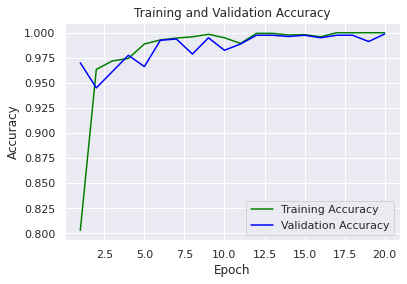

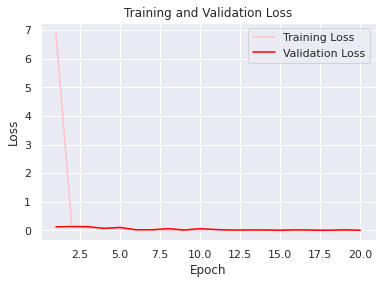

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
!wget -O lion.jpg https://pbs.twimg.com/profile_images/1303387955331960832/AsLQ2rIh_400x400.jpg

import cv2

img = cv2.imread('/content/lion.jpg',cv2.IMREAD_UNCHANGED) 


--2021-10-19 13:50:17--  https://pbs.twimg.com/profile_images/1303387955331960832/AsLQ2rIh_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.173.16, 2606:2800:220:1410:489:141e:20bb:12f6
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.173.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27101 (26K) [image/jpeg]
Saving to: ‘lion.jpg’

lion.jpg            100%[===================>]  26.47K  --.-KB/s    in 0s      

2021-10-19 13:50:17 (174 MB/s) - ‘lion.jpg’ saved [27101/27101]



In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [ ]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

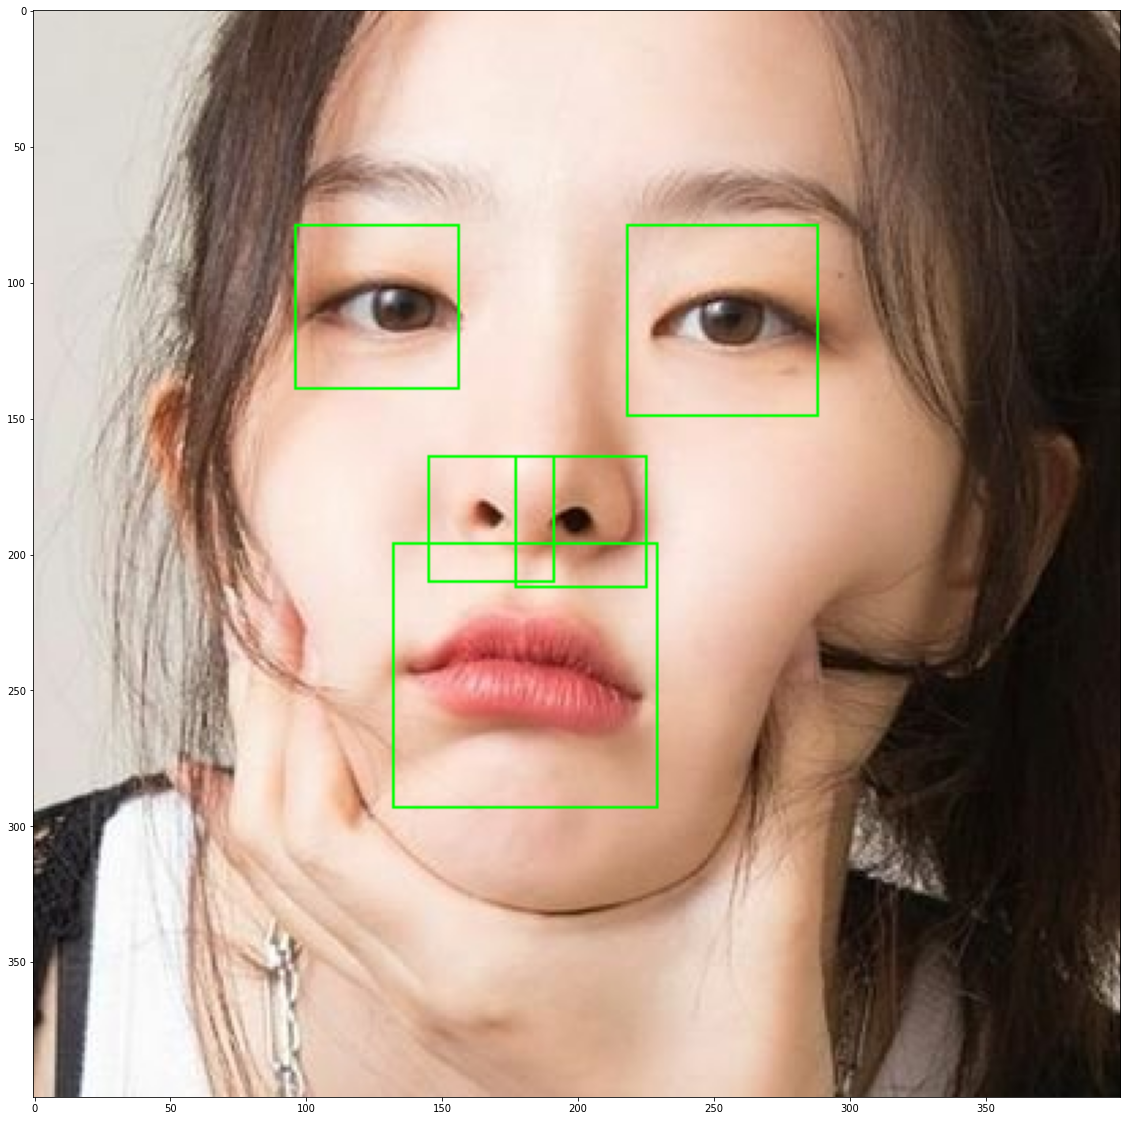

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

--2021-09-03 07:27:00--  https://cphoto.asiae.co.kr/listimglink/1/2018102618556720_1540566060.jpg
Resolving cphoto.asiae.co.kr (cphoto.asiae.co.kr)... 114.31.35.14
Connecting to cphoto.asiae.co.kr (cphoto.asiae.co.kr)|114.31.35.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19357 (19K) [image/jpeg]
Saving to: ‘lion3.jpg’

lion3.jpg           100%[===================>]  18.90K  --.-KB/s    in 0s      

2021-09-03 07:27:03 (151 MB/s) - ‘lion3.jpg’ saved [19357/19357]



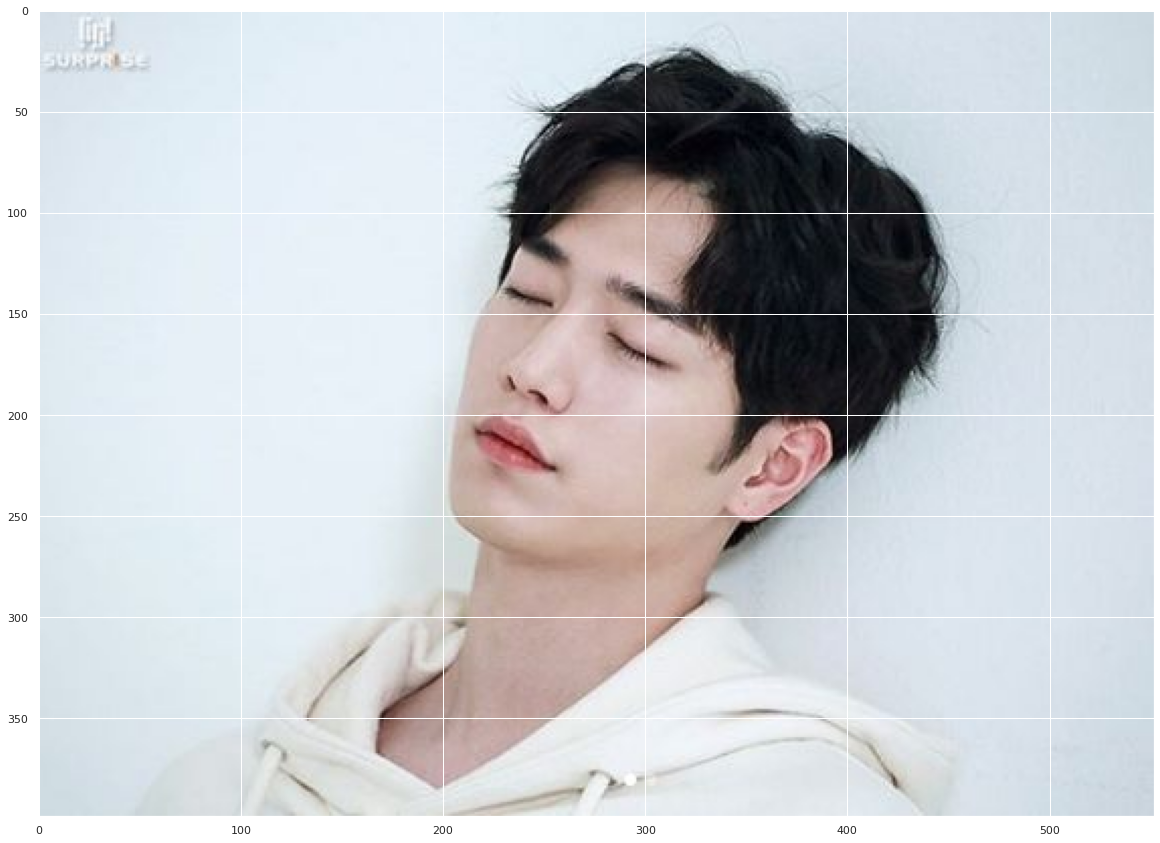

In [ ]:
!wget -O lion3.jpg https://cphoto.asiae.co.kr/listimglink/1/2018102618556720_1540566060.jpg
import cv2

img2 = cv2.imread('/content/lion3.jpg',cv2.IMREAD_UNCHANGED) 
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray2, 1.1, 30)
for (x, y, w, h) in eyes:
  cv2.rectangle(img2, (x,y), (x+w, y+h), (0, 255, 0), 1)
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
eyes

array([[337, 109,  53,  53]], dtype=int32)

In [ ]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 30)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img2[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray, 1.1, 4)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

eyes not detected


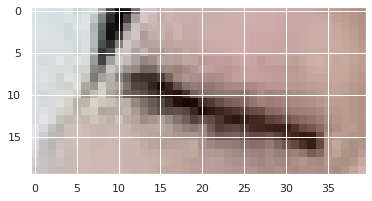

In [ ]:

plt.imshow(cv2.cvtColor(img2[130:150,220:260], cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi = img2[220:250,250:270]

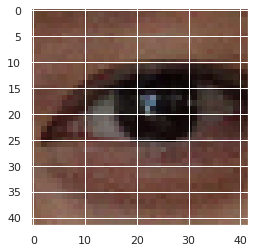

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

(39, 39, 3)

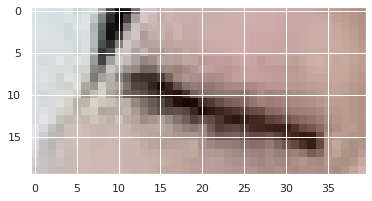

In [ ]:
plt.imshow(cv2.cvtColor(img2[130:150,220:260], cv2.COLOR_BGR2RGB))

In [ ]:
final_img = cv2.resize(img2[130:150,220:260], (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [ ]:
prediction = model.predict(final_img)

[[0.52223706]]
open


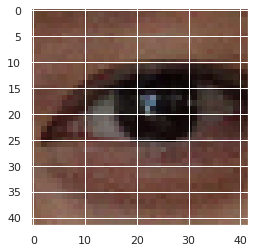

In [ ]:
class_names = {0:"closes",1:"open"}

print(prediction)
print(class_names[round(prediction[0][0])])
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

[[0.00025302]]
closes


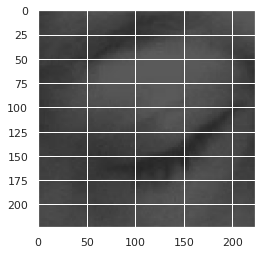

In [ ]:
image_path = '/content/drive/MyDrive/sample_eyes/Closed_Eyes/s0034_00046_0_0_0_0_0_02.png'
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
print(class_names[round(prediction[0][0])])
plt.imshow(new_img)

In [ ]:
image_path

'/content/drive/MyDrive/sample_eyes/Closed_Eyes/s0034_00046_0_0_0_0_0_02.png'

[[0.9906811]]
open


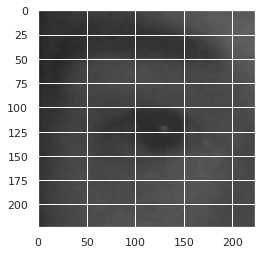

In [ ]:
image_path = "/content/drive/MyDrive/train/Open_Eyes/s0001_02339_0_0_1_0_0_01.png"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
print(class_names[round(prediction[0][0])])
plt.imshow(new_img)